<a href="https://colab.research.google.com/github/aj-39719/Deep-Learning-ST456/blob/main/Deep_Learning_Summative_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **P1: Setup**

In [69]:
# We begin by doing some necessary imports. 

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Setting up training and testing data**

In [4]:
#Loading Training Data
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train-1.csv",header = None)

X = train_data.values[:,:-1]
y = train_data.values[:,-1]

#Loading Test Data
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test-1.csv",header = None)

test_x = test_data.values[:,:-1]
test_y = test_data.values[:,-1]

#Splitting the training data into validation data
train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size=0.1)

# **P1.1** 
### Neural Network Implementation

**Defining the Model**

In [5]:
def baseline_model(lat_dim, activation1, activation2):
  model = keras.Sequential([  
  
  # ************* Phi Layers *************

  # first, we add the hidden layer with an activation function
    layers.Dense(100, input_shape = [10], activation = activation1),                

  # the output layer
    layers.Dense(lat_dim),

  # ************* Rho Layers *************
    layers.Dense(100,activation = activation2),
    layers.Dense(1)
  ])
  return model

**Explanation**

The model is based on the sum-decomposition architecture for permutation invariant functions. There are two separate layers - one for roh function and one for phi function. 
The input shape provide is [10] and the lat_dim layer can have a variable numbe of neurons. 
Dense layers have been used in order to achieve a fully connected architecture of neurons

**Define a generic plotting function**

In [6]:
def plot_loss(history):
   plt.figure()
   plt.rc('figure', autolayout=True)
   plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold', titlesize=18, titlepad=10)
   plt.plot(history.history['loss'], label='loss', marker = '.')
   plt.plot(history.history['val_loss'], label='val_loss', marker = '.')
   plt.xlabel('Epochs')
   plt.ylabel('Error')
   plt.legend(loc=1)
   plt.title("Training vs Validation Loss")
   plt.grid(True, color = 'k', linestyle= ':')

# **P1.2** 



**1) lat_dim = 5 for 10 epochs**

In [7]:
lat_dim = 5
opt = tf.optimizers.SGD(learning_rate=1e-4)

model1 = baseline_model(5,'relu','relu')

model1.compile(optimizer=opt, loss='mse', metrics = 'MeanSquaredError')
history1 = model1.fit(train_x, train_y,validation_data=(valid_x, valid_y), epochs=10, batch_size=128, verbose=0)

In [8]:
loss, acc = model1.evaluate(test_x, test_y, verbose=2)
print('Test Accuracy: %.3f' % acc)

313/313 - 0s - loss: 0.0122 - mean_squared_error: 0.0122 - 362ms/epoch - 1ms/step
Test Accuracy: 0.012


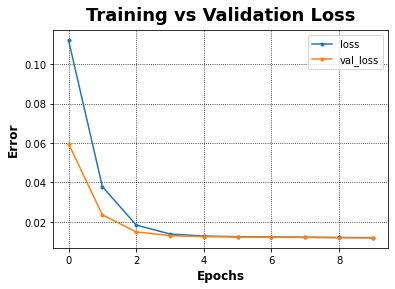

In [9]:
plot_loss(history1)


**2) lat_dim = 100 for 10 epochs**

In [10]:
#lat_dim = 100
opt = tf.optimizers.SGD(learning_rate=1e-4)
model2 = baseline_model(100,"relu","relu")
model2.compile(optimizer=opt, loss='mse', metrics = 'MeanSquaredError')
history2 = model2.fit(train_x, train_y,validation_data=(valid_x, valid_y), epochs=10, batch_size=128, verbose=0)

In [11]:
loss, acc = model2.evaluate(test_x, test_y, verbose=2)
print('Test Accuracy: %.3f' % loss)

313/313 - 0s - loss: 0.0079 - mean_squared_error: 0.0079 - 381ms/epoch - 1ms/step
Test Accuracy: 0.008


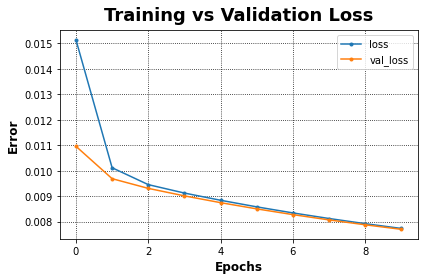

In [12]:
plot_loss(history2)

**Discussion**

We see that when we increase the lat_dim variable to 100, the training loss is decreased manifold from the very first epoch. The training and test loss is better for the second case with lat_dim = 100 and converges towards 0.01 towards the end of epoch 10. 

# **P1.3** 



**learning rate  = 0.01**

In [13]:
lat_dim = 100
opt2 = tf.optimizers.SGD(learning_rate=0.01)

model3 = baseline_model(100,"relu","relu")
model3.compile(optimizer=opt2, loss='mse', metrics = 'MeanSquaredError')
history3 = model3.fit(train_x, train_y,validation_data=(valid_x, valid_y), epochs=10, batch_size=128, verbose=0)

In [14]:
loss, acc = model3.evaluate(test_x, test_y, verbose=2)
print('Test Accuracy for learning rate 0.01: %.3f' % acc)


313/313 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - 364ms/epoch - 1ms/step
Test Accuracy for learning rate 0.01: 0.004



**learning rate  = 0.1**

In [15]:
lat_dim = 100
opt3 = tf.optimizers.SGD(learning_rate=0.1)

model4 = baseline_model(100,"relu","relu")
model4.compile(optimizer=opt3, loss='mse', metrics = 'MeanSquaredError')
history4 = model4.fit(train_x, train_y,validation_data=(valid_x, valid_y), epochs=10, batch_size=128, verbose=0)

In [16]:
loss, acc = model4.evaluate(test_x, test_y, verbose=2)
print('Test Accuracy for learning rate 0.1: %.3f' % acc)


313/313 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - 353ms/epoch - 1ms/step
Test Accuracy for learning rate 0.1: 0.004



**learning rate  = 0.5**

In [17]:
lat_dim = 100
opt4 = tf.optimizers.SGD(learning_rate=0.5)

model5 = baseline_model(100,"relu","relu")
model5.compile(optimizer=opt4, loss='mse', metrics = 'MeanSquaredError')
history5 = model5.fit(train_x, train_y,validation_data=(valid_x, valid_y), epochs=10, batch_size=128, verbose=0)

In [18]:
loss, acc = model5.evaluate(test_x, test_y, verbose=2)
print('Test Accuracy for learning rate 0.5: %.3f' % acc)

313/313 - 0s - loss: nan - mean_squared_error: nan - 359ms/epoch - 1ms/step
Test Accuracy for learning rate 0.5: nan



 **Plotting graphs**

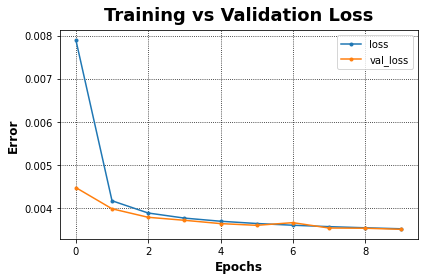

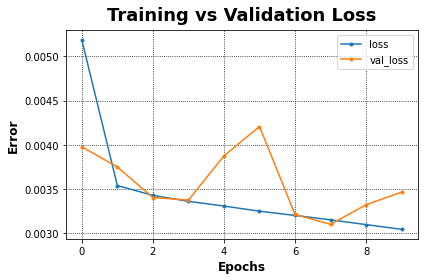

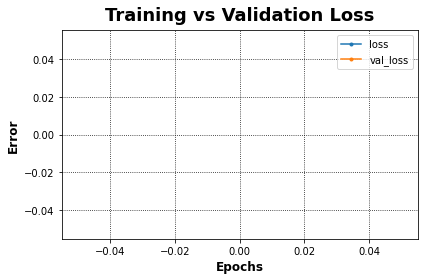

In [19]:
plot_loss(history3)
plot_loss(history4)
plot_loss(history5)

### **Discussion**
We see that for learning rate = 0.01, the curve is smooth and the gradient descent is also predictable. 
For learning rate = 0.1 the training loss is still more or less smooth but the validation loss is zig-zag.
For learning rate = 0.5, the loss is nan. 


This shows us how a larger learning rates have unpredictable gradient patterns


# **P1.4** 
 **1) lat_dim = 100,epochs = 50** 
 

In [20]:
lat_dim = 100
opt = tf.optimizers.SGD(learning_rate=1e-4)

model6 = baseline_model(100,"relu","relu")
model6.compile(optimizer=opt, loss='mse', metrics = 'MeanSquaredError')
history6 = model6.fit(train_x, train_y,validation_data=(valid_x, valid_y), epochs=50, batch_size=128, verbose=0)

In [21]:
loss, acc = model6.evaluate(test_x, test_y, verbose=2)
print('Test Accuracy for ReLu Activation Function: %.3f' % acc)


313/313 - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - 356ms/epoch - 1ms/step
Test Accuracy for ReLu Activation Function: 0.007


**2) lat_dim = 100, activation function = sigmoid**

In [22]:
lat_dim = 100
opt = tf.optimizers.SGD(learning_rate=1e-4)

model7 = baseline_model(100,"sigmoid","sigmoid")
model7.compile(optimizer=opt, loss='mse', metrics = 'MeanSquaredError')
history7 = model7.fit(train_x, train_y,validation_data=(valid_x, valid_y), epochs=50, batch_size=128, verbose=0)

313/313 - 0s - loss: 0.0189 - mean_squared_error: 0.0189 - 359ms/epoch - 1ms/step
Test Accuracy for Sigmoid  function model: 0.019


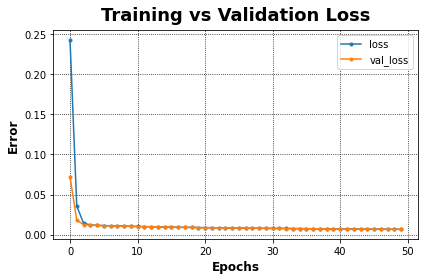

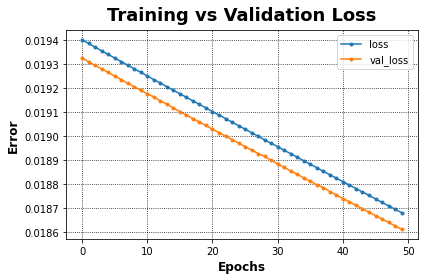

In [23]:
loss, acc = model7.evaluate(test_x, test_y, verbose=2)
print('Test Accuracy for Sigmoid  function model: %.3f' % acc)

#The first plot is for first case, i.e., relu activation function
plot_loss(history6) 

#The second plot is for second case, i.e., sigmoid activation function
plot_loss(history7) 

**Discussion**


For ReLu activation functions, the descent is smooth and plateaus after 20 epochs and the decrease in loss is not substantial.

For the Sigmoid Activation function, the initial loss is lower compared to Relu, but has a linear descent and does not converge as quickly to a minimum value as the ReLu function

# **P1.5** 


In [72]:
from keras.callbacks import ModelCheckpoint
opt = tf.optimizers.SGD(learning_rate=1e-4)

lat_dim_values = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]

early_stop = EarlyStopping(monitor='loss', mode='min', verbose=0, patience=5, restore_best_weights=True)
rlp = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1)

mse = []

for i in lat_dim_values:
  for i in range(5) :
    checkpointer = ModelCheckpoint(filepath='data.model.best.hdf5', verbose=0, save_best_only=True)

    modelx = baseline_model(i,"relu","relu")
    modelx.compile( loss="mse", optimizer=opt)
    history_new = modelx.fit (train_x, train_y, epochs=5, batch_size=128, verbose=0, validation_data=(valid_x, valid_y), callbacks=[checkpointer, early_stop, rlp])
    modelx.load_weights('data.model.best.hdf5')
    loss = modelx.evaluate(test_x,test_y, verbose=0)
    mse.append(loss)


mean_mse = (sum(mse)/len(mse))

In [73]:
new_mean_mse = []
for k in range(0,95,5):
  new_mean = (mse[k] + mse[k+1] + mse[k+2] + mse[k+3] + mse[k+4])/5
  new_mean_mse.append(new_mean)

No handles with labels found to put in legend.


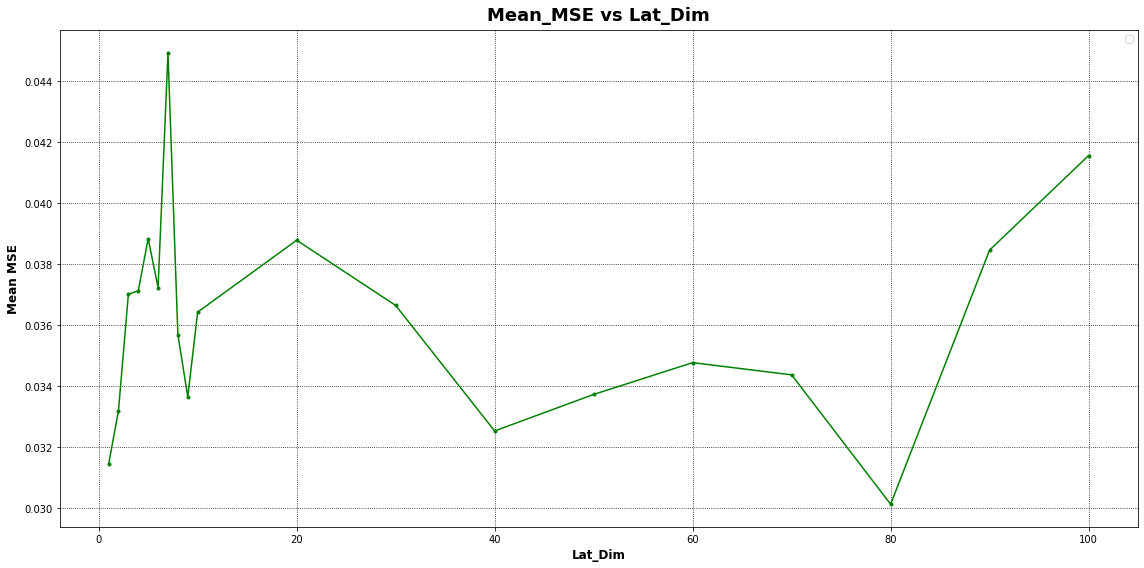

In [74]:
plt.figure(figsize = (16,8))
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titlesize=18, titlepad=10)
plt.plot(lat_dim_values,new_mean_mse,"g", marker = '.')
plt.xlabel('Lat_Dim')
plt.ylabel('Mean MSE')
plt.legend(loc=1)
plt.title("Mean_MSE vs Lat_Dim")
plt.grid(True, color = 'k', linestyle= ':')

**Discussion**

As we see from the graph, the value for Mean MSE fluctuates a lot by chaging lat_dim

# **P2: Setup**

In [61]:
#Setting up Training Data 

train_data2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/xtrain-2.csv")
train_data2_y = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ytrain-2.csv")

x2 = pd.DataFrame(train_data2.values[:,1:])
y2 = pd.DataFrame(train_data2_y.values[:,1:])


#Setting up Testing Data

test_data2 =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/xtest-2.csv")
test_data2_y =  pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ytest-2.csv")


x2_test = pd.DataFrame(test_data2.values[:,1:])
y2_test = pd.DataFrame(test_data2_y.values[:,1:])

In [62]:
#Check Shapes of the data loaded
x2.shape , y2.shape, x2_test.shape, y2_test.shape

((200000, 15), (200000, 5), (200000, 15), (200000, 5))

*Hence, we need to reshape this dataset in order to create a permutation equivariance model using Convolutional Neural Network layers.*

**Reshaping Data :**

In [63]:
x2 = x2.values.reshape(200000,5,3)
x2_test = x2_test.values.reshape(200000,5,3)

#Check the shapes again
x2.shape , y2.shape, x2_test.shape, y2_test.shape

((200000, 5, 3), (200000, 5), (200000, 5, 3), (200000, 5))

**Splitting Training and Validation Data :**

In [64]:
#Splitting the data-set for training and validation
train_x2, valid_x2, train_y2, valid_y2 = train_test_split(x2, y2, test_size=0.1)

# **P2.1**
**Neural Network Implementation**

In [65]:
from keras import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout

def NewModel(L,w):
  model_cnn = Sequential()
  model_cnn.add(Conv1D(filters=32, kernel_size=3, activation= "relu", input_shape= (5,3), padding = 'same'))
  
  #Adding affine transformation layer
  for i in range(1,L) :
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation= "relu", padding='same'))

  model_cnn.add(MaxPooling1D(pool_size=2)),
  model_cnn.add(Flatten()),
  model_cnn.add(Dense(5, activation = 'softmax'))
  return model_cnn

**Compiling the model and viewing its summary**

In [66]:
m = NewModel(L=2, w=5)

#Setting up the optimization parameters - 
new_opt = tf.keras.optimizers.Adam(learning_rate= 1e-4, epsilon= 1e-3)

m.compile(loss= 'mse' ,optimizer = new_opt)
#m.summary()

# **P2.2**

**Fitting the model and plotting the training and validation loss**

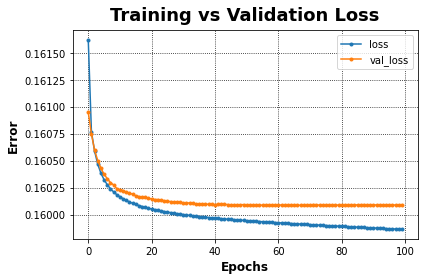

In [67]:
early_stop = EarlyStopping(monitor='loss', mode='min', verbose=0, patience=5, restore_best_weights=True)
rlp = ReduceLROnPlateau(monitor='loss', patience=3, verbose=1)
new_history = m.fit(train_x2, train_y2, validation_data=(valid_x2,valid_y2), epochs=100, batch_size=300, verbose = 0, callbacks=[early_stop, rlp])
plot_loss(new_history)

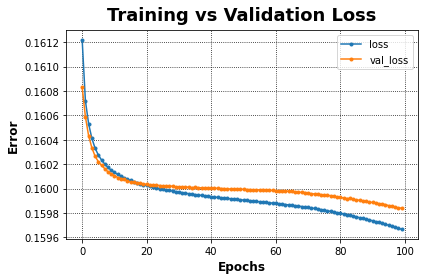

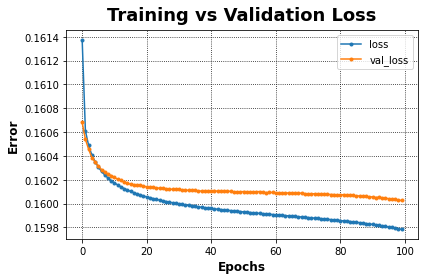

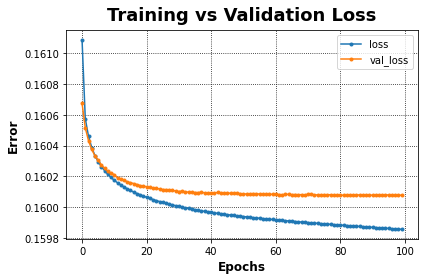

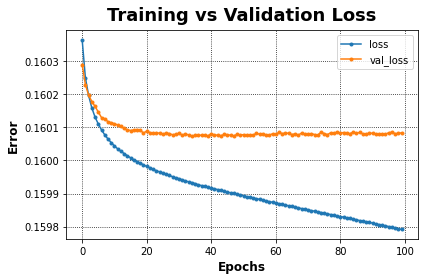

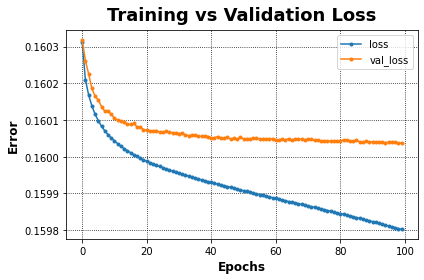

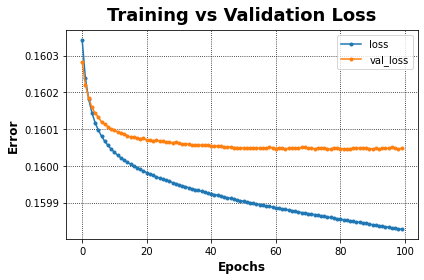

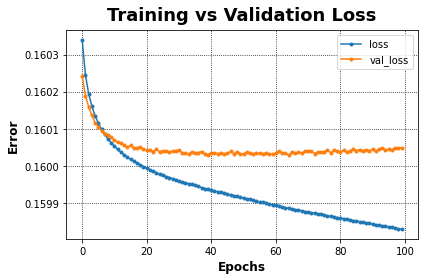

In [68]:
m2 = NewModel(L=2, w=10)
m3 = NewModel(L=2, w=100)
m4 = NewModel(L=2, w=200)
m5 = NewModel(L=3, w=5)
m6 = NewModel(L=3, w=10)
m7 = NewModel(L=3, w=100)
m8 = NewModel(L=3, w=200)

#Setting up the optimization parameters - 
new_opt = tf.keras.optimizers.Adam(learning_rate= 1e-4, epsilon= 1e-3)

m2.compile(loss= 'mse' ,optimizer = new_opt)
m3.compile(loss= 'mse' ,optimizer = new_opt)
m4.compile(loss= 'mse' ,optimizer = new_opt)
m5.compile(loss= 'mse' ,optimizer = new_opt)
m6.compile(loss= 'mse' ,optimizer = new_opt)
m7.compile(loss= 'mse' ,optimizer = new_opt)
m8.compile(loss= 'mse' ,optimizer = new_opt)


new_history2 = m2.fit(train_x2, train_y2, validation_data=(valid_x2,valid_y2), epochs=100, batch_size=300, verbose = 0,callbacks=[early_stop, rlp])
new_history3 = m3.fit(train_x2, train_y2, validation_data=(valid_x2,valid_y2), epochs=100, batch_size=300, verbose = 0,callbacks=[early_stop, rlp])
new_history4 = m4.fit(train_x2, train_y2, validation_data=(valid_x2,valid_y2), epochs=100, batch_size=300, verbose = 0,callbacks=[early_stop, rlp])
new_history5 = m5.fit(train_x2, train_y2, validation_data=(valid_x2,valid_y2), epochs=100, batch_size=300, verbose = 0,callbacks=[early_stop, rlp])
new_history6 = m6.fit(train_x2, train_y2, validation_data=(valid_x2,valid_y2), epochs=100, batch_size=300, verbose = 0,callbacks=[early_stop, rlp])
new_history7 = m7.fit(train_x2, train_y2, validation_data=(valid_x2,valid_y2), epochs=100, batch_size=300, verbose = 0,callbacks=[early_stop, rlp])
new_history8 = m8.fit(train_x2, train_y2, validation_data=(valid_x2,valid_y2), epochs=100, batch_size=300, verbose = 0,callbacks=[early_stop, rlp])

plot_loss(new_history2)
plot_loss(new_history3)
plot_loss(new_history4)
plot_loss(new_history5)
plot_loss(new_history6)
plot_loss(new_history7)
plot_loss(new_history8)

